In [163]:
!pip install xlrd
!pip install statsmodels
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install statsmodels

In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [165]:
df = pd.read_excel("GYTS4.xls",sheet_name="Sheet1")
df_copy = df.copy()

For the scope of this study, we will be restricting ourselves to urban areas as well as dealing with Current tobacco users and Current tobacco smokers whilst taking the independent variable as those which hypothese will have a negative relation on that of these variable while being related to students.

Now I will filter out the data for independent and dependent variable whilst performing some preliminary analysis.

In [166]:
column_data = [item for item in df.columns.tolist() if item not in [
    "Ever tobacco users (%)",
    'Ever tobacco smokers (%)',
    'Ever cigarette users (%)',
    'Ever bidi users (%) ',
    'Ever smokeless tobacco users (%)',
    'Ever users of  paan masala together with tobacco (%)',
    'Never cigarette smokers susceptible to cigarette use in future (%)',
    'Ever e-cigarette use (%)',
    'Ever tobacco smokers who quit in last 12 months (%)',
    'Current tobacco smokers who tried to quit smoking in the past 12 months (%)',
    'Current tobacco smokers who wanted to quit smoking now   (%)',
    'Ever  smokeless tobacco users who quit  in last 12 months (%)',
    'Current smokeless tobacco users who tried to quit tobacco in the past 12 months   (%)',
    'Current  smokeless tobacco users who wanted to quit tobacco now     (%)',
    'Exposure to tobacco smoke at home/public place (%)',
    'Exposure to tobacco smoke at home   (%)',
    'Exposure to tobacco smoke inside any enclosed public  places  (%)',
    'Exposure to tobacco smoke at any outdoor public places  (%)',
    'Bought Cigarette as individual sticks in past 30 days    (%)',
    'Bought Bidi as individual sticks in past 30 days     (%)',
    'Major source of tobacco product- Cigarette: Store   (%)',
    'Major source of tobacco product- Cigarette: Paan shop (%)',
    'Major source of tobacco product- Bidi: Store   (%)',
    'Major source of tobacco product- Bidi: Paan shop (%)',
    'Major source of tobacco product- Smokeless tobacco: Store   (%)',
    'Major source of tobacco product- Smokeless tobacco: Paan shop  (%)',
    'Current cigarette smokers who bought cigarettes from a store, paan shop, street vendor, or vending machine       (%)',
    'Current bidi smokers who bought bidi from a store, paan shop, or street vendor (%)',
    'Refused sale of cigarette because of age in past 30 days   (%)',]
    ]

['State/UT',
 'Area',
 'Current tobacco users (%)',
 'Current tobacco smokers (%)',
 'Current cigarette users (%)',
 'Current bidi users (%)',
 'Current smokeless tobacco users (%)',
 'Median age of initiation of Cigarette (in years)',
 'Median age of initiation of Bidi (in years)',
 'Median age of initiation of smokeless tobacco (in years)',
 'Awareness about e-cigarette (%)',
 'Students who saw anyone smoking inside the  school building or outside school property (%)',
 'Refused sale of bidi because of age in past 30 days   (%)',
 'Refused sale of smokeless tobacco because of age in past 30 days    (%)',
 'Students who noticed anti-tobacco messages anywhere in past 30 days    (%)',
 'Students who noticed anti-tobacco messages in mass media in past 30 days    (%)',
 'Students who noticed anti-tobacco messages at sporting,  fairs, concerts, community events or social gatherings in past 30 days   (%)',
 'Students who noticed health warnings on any tobacco product/cigarette packages in p

In [167]:
modified_df =  df[column_data]

30


Now We have created a modified dataframe to work with which have the necessary variable to work with and we will try to see the correlation between each of the variable to determine if we should include on or the other in the study.

In [169]:
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 30 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   State/UT                                                                                                                               108 non-null    object 
 1   Area                                                                                                                                   108 non-null    object 
 2   Current tobacco users (%)                                                                                                              108 non-null    float64
 3   Current tobacco smokers (%)                                           

In [171]:
striping_df = modified_df[['Median age of initiation of Cigarette (in years)',
 'Median age of initiation of Bidi (in years)',
 'Median age of initiation of smokeless tobacco (in years)','Students who saw anyone using tobacco on mass media in past 30 days  (%)']]

In [180]:
condition = (striping_df['Median age of initiation of Cigarette (in years)'] == '<7')
striping_df.loc[condition, 'Median age of initiation of Cigarette (in years)'] = 7
condition = (striping_df['Median age of initiation of Cigarette (in years)'] == '<7.0')
striping_df.loc[condition, 'Median age of initiation of Cigarette (in years)'] = 7
condition = (striping_df['Median age of initiation of Cigarette (in years)'] == '--')
striping_df.loc[condition, 'Median age of initiation of Cigarette (in years)'] = 7
condition = (striping_df['Median age of initiation of Bidi (in years)'] == '<7')
striping_df.loc[condition, 'Median age of initiation of Bidi (in years)'] = 7
condition = (striping_df['Median age of initiation of Bidi (in years)'] == '<7.0')
striping_df.loc[condition, 'Median age of initiation of Bidi (in years)'] = 7
condition = (striping_df['Median age of initiation of smokeless tobacco (in years)'] == '<7')
striping_df.loc[condition, 'Median age of initiation of smokeless tobacco (in years)'] = 7
condition = (striping_df['Median age of initiation of smokeless tobacco (in years)'] == '<7.0')
striping_df.loc[condition, 'Median age of initiation of smokeless tobacco (in years)'] = 7
condition = (striping_df['Median age of initiation of smokeless tobacco (in years)'] == '--')
striping_df.loc[condition, 'Median age of initiation of smokeless tobacco (in years)'] = 7
condition = (striping_df['Students who saw anyone using tobacco on mass media in past 30 days  (%)'] == '63..4')
striping_df.loc[condition, 'Students who saw anyone using tobacco on mass media in past 30 days  (%)'] = 63.4

In [181]:
column_name = 'Median age of initiation of Cigarette (in years)'
striping_df[column_name] = striping_df[column_name].astype(float)
column_name = 'Median age of initiation of Bidi (in years)'
striping_df[column_name] = striping_df[column_name].astype(float)
column_name = 'Median age of initiation of smokeless tobacco (in years)'
striping_df[column_name] = striping_df[column_name].astype(float)
column_name = 'Students who saw anyone using tobacco on mass media in past 30 days  (%)'
striping_df[column_name] = striping_df[column_name].astype(float)

/var/folders/k8/67v5qvtx553739l3mlh4vnjw0000gn/T/ipykernel_13914/496462818.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  striping_df[column_name] = striping_df[column_name].astype(float)
/var/folders/k8/67v5qvtx553739l3mlh4vnjw0000gn/T/ipykernel_13914/496462818.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  striping_df[column_name] = striping_df[column_name].astype(float)
/var/folders/k8/67v5qvtx553739l3mlh4vnjw0000gn/T/ipykernel_13914/496462818.py:6: SettingWithCopyWarning: 
A value is trying to

In [182]:
striping_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 4 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Median age of initiation of Cigarette (in years)                          108 non-null    float64
 1   Median age of initiation of Bidi (in years)                               108 non-null    float64
 2   Median age of initiation of smokeless tobacco (in years)                  108 non-null    float64
 3   Students who saw anyone using tobacco on mass media in past 30 days  (%)  108 non-null    float64
dtypes: float64(4)
memory usage: 3.5 KB


In [183]:
for col in striping_df:
    modified_df[col] = striping_df[col]

/var/folders/k8/67v5qvtx553739l3mlh4vnjw0000gn/T/ipykernel_13914/1207596574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modified_df[col] = striping_df[col]


In [184]:
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 30 columns):
 #   Column                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                 --------------  -----  
 0   State/UT                                                                                                                               108 non-null    object 
 1   Area                                                                                                                                   108 non-null    object 
 2   Current tobacco users (%)                                                                                                              108 non-null    float64
 3   Current tobacco smokers (%)                                           

In [186]:
abbreviation_mapping = {
   'State/UT':'State/UT',
   'Area':'Area',
   'Current tobacco users (%)': 'CTU',
 'Current tobacco smokers (%)': 'CTS',
 'Current cigarette users (%)': 'CCU',
 'Current bidi users (%)': 'CBU',
 'Current smokeless tobacco users (%)': 'CSTU',
 'Median age of initiation of Cigarette (in years)': 'MAIC',
 'Median age of initiation of Bidi (in years)':'MAIB',
 'Median age of initiation of smokeless tobacco (in years)':'MAIST',
 'Awareness about e-cigarette (%)':'AEC',
 'Students who saw anyone smoking inside the  school building or outside school property (%)':'SSSB',
 'Refused sale of bidi because of age in past 30 days   (%)':'RSB',
 'Refused sale of smokeless tobacco because of age in past 30 days    (%)': 'RSST',
 'Students who noticed anti-tobacco messages anywhere in past 30 days    (%)': 'SATM',
 'Students who noticed anti-tobacco messages in mass media in past 30 days    (%)':'SATMM',
 'Students who noticed anti-tobacco messages at sporting,  fairs, concerts, community events or social gatherings in past 30 days   (%)':'SATMSFETC',
 'Students who noticed health warnings on any tobacco product/cigarette packages in past 30 days       (%)':'SHW',
 'Students who saw tobacco advertisements anywhere in past 30 days  (%)':'STA',
 'Students who saw anyone using tobacco on mass media in past 30 days  (%)':'SSATMM',
 'Students who noticed cigarette advertisements/promotions at point of sale in past 30 days (%)':'STCHE30D',
 'Students who were taught in class about harmful effects of tobacco use during past 12 months (%)':'STCHE12M',
 'Students who thought it is difficult to quit once someone starts smoking tobacco (%)':'STQT',
 'Students who thought other people’s tobacco smoking is harmful to them (%)':'STTH',
 'Students who favoured ban on smoking inside enclosed public places (%)':'SFBEPP',
 'Students who favoured ban on smoking at outdoor public places (%)':'SFBOPP',
 'School heads aware of COTPA, 2003  (%)':'SCHHA',
 'Schools authorized by the state government to collect fine for violation under Section-6 of the COTPA, 2003  (%)':'SCHASGFV',
 'Schools followed ‘tobacco-free school’ guidelines  (%)':'SCHFTFSG',
 'Schools aware of the policy for displaying ‘tobacco-free school’ board  (%)':'SAPDTFSB'
}

modified_df.columns = [abbreviation_mapping[col] for col in modified_df.columns]


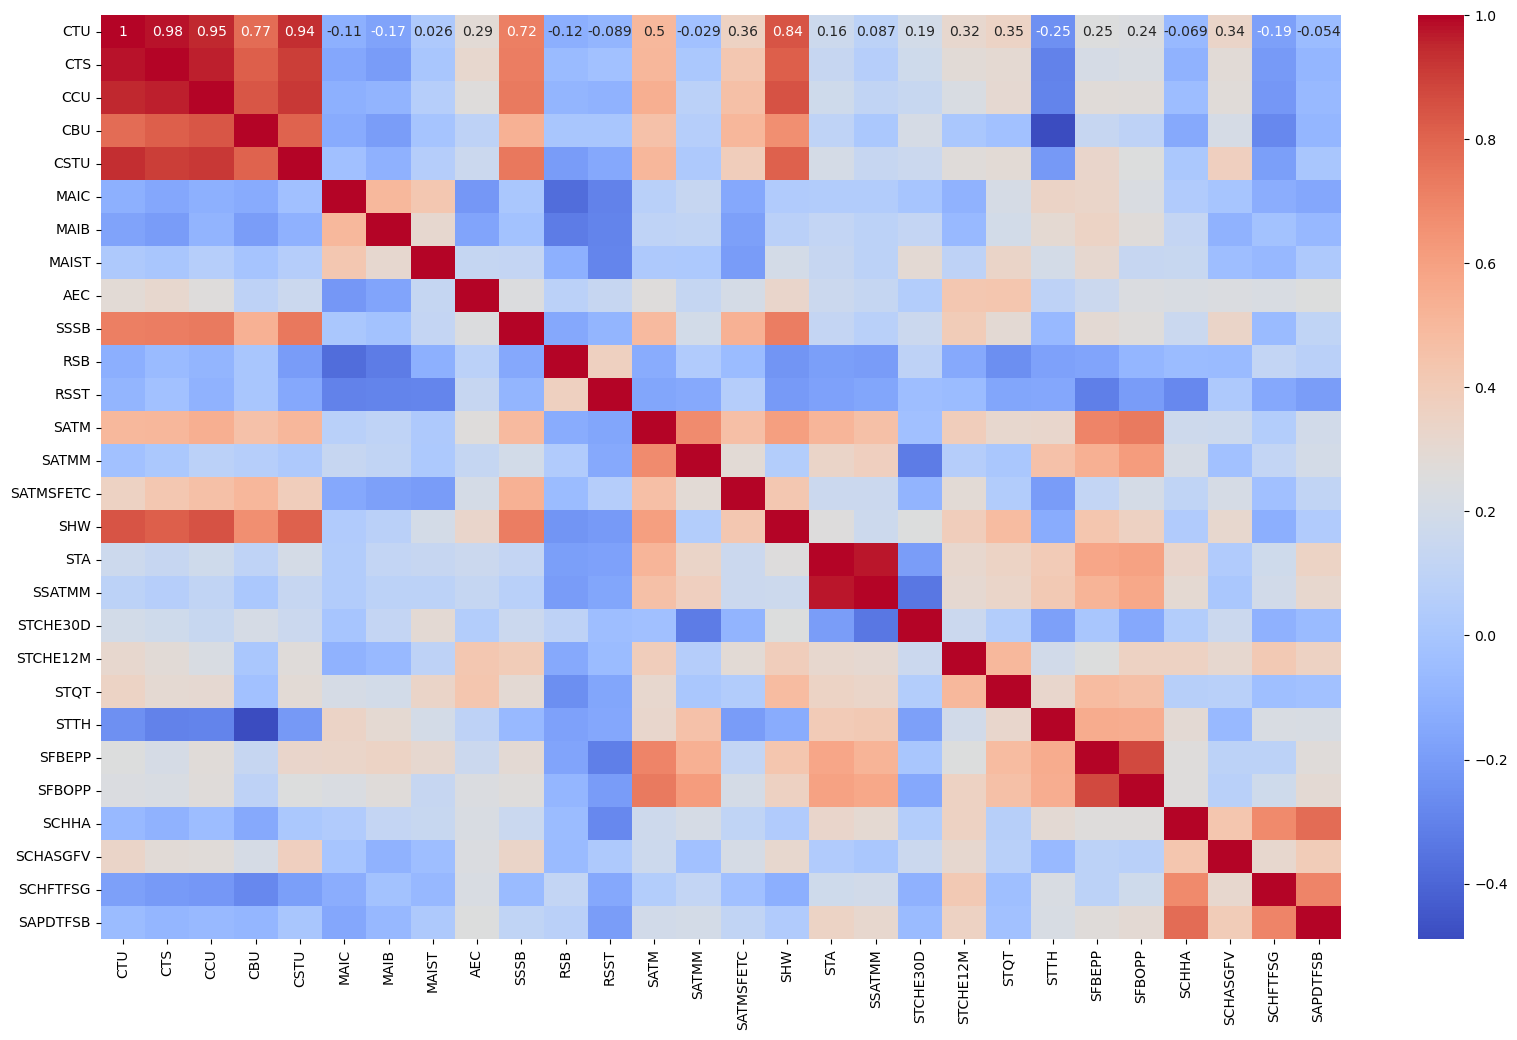

In [187]:
heatmap_df = modified_df.drop(['State/UT','Area'], axis=1)
correlation_matrix = heatmap_df.corr()
plt.figure(figsize=(20, 12)) 
# Create a heatmap from the DataFrame
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

Since we can observe that the heat map shows the CTU,CTS,CCU,CBU,CSTU to be highly correlated so we will be doing the study of onlly of the variable.

In [188]:
modified_df_without_total = modified_df[modified_df['Area']!='Total']
modified_df_with_total = modified_df[modified_df['Area']=='Total']

In [189]:
one_hot_encoded = pd.get_dummies(modified_df_without_total['State/UT'])
modified_df_without_total_encoded = pd.concat([modified_df_without_total, one_hot_encoded], axis=1)
one_hot_encoded = pd.get_dummies(modified_df_without_total_encoded['Area'])
modified_df_without_total_encoded = pd.concat([modified_df_without_total_encoded, one_hot_encoded], axis=1)

In [190]:
one_hot_encoded = pd.get_dummies(modified_df_with_total['State/UT'])
modified_df_with_total_encoded = pd.concat([modified_df_with_total, one_hot_encoded], axis=1)

In [155]:
# modified_df_without_total_encoded = modified_df_without_total_encoded.drop(['State/UT','Area'],axis=1)


In [152]:
# y = modified_df_without_total_encoded[['CTU']]
# y.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 1 to 107
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CTU     72 non-null     Float64
dtypes: Float64(1)
memory usage: 3.2 KB


In [191]:
def get_stata_nontotal(col):
    boolean_columns = modified_df_without_total_encoded.select_dtypes(include=bool).columns
    modified_df_without_total_encoded[boolean_columns] = modified_df_without_total_encoded[boolean_columns].astype(int)
    X = modified_df_without_total_encoded.drop(columns=['State/UT','Area','CTU','CTS','CCU','CBU','CSTU','STA'])
    y = modified_df_without_total_encoded[[col]]
    model = sm.OLS(y, X)
    results = model.fit(cov_type='HC3')  
    print(results.summary())

def get_stata_total(col):
    boolean_columns = modified_df_with_total_encoded.select_dtypes(include=bool).columns
    modified_df_with_total_encoded[boolean_columns] = modified_df_with_total_encoded[boolean_columns].astype(int)
    X = modified_df_with_total_encoded.drop(columns=['State/UT','Area','CTU','CTS','CCU','CBU','CSTU','STA'])
    y = modified_df_with_total_encoded[col]
    model = sm.OLS(y, X)
    results = model.fit(cov_type='HC3') 
    print(results.summary())

In [198]:
column_name= input("ENTER THE ABREVIATION FOR THE COLUMN FOR WHICH YOU WANT TO RUN REGRESSION (['CTU','CTS','CCU','CBU','CSTU','STA']):")
print("------------WITH DIVISION IN RURAL AND URBAN-------------")
get_stata_nontotal(column_name)
print("------------WITHOUT DIVISION IN RURAL AND URBAN-------------")
get_stata_total(column_name)

------------WITH DIVISION IN RURAL AND URBAN-------------
                            OLS Regression Results                            
Dep. Variable:                    CTU   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 02 May 2024   Prob (F-statistic):                nan
Time:                        22:41:46   Log-Likelihood:                -122.33
No. Observations:                  72   AIC:                             362.7
Df Residuals:                      13   BIC:                             497.0
Df Model:                          58                                         
Covariance Type:                  HC3                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------

/Users/devanshuagrawal/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/Users/devanshuagrawal/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
